Importing dataset

In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [18]:
#!/bin/bash
!kaggle datasets download mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
import zipfile
zip_ref= zipfile.ZipFile('/content/creditcardfraud.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

Importing libraries and dependencies

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [21]:
df = pd.read_csv('/content/creditcard.csv')

In [22]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
df.shape

(284807, 31)

In [72]:
# df.isnull().sum()
df.isnull().sum().max()

0

In [25]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [26]:
print('Not frauds',round((df["Class"].value_counts()[0])/len(df)*100,2), '%')
print('Frauds', round((df["Class"].value_counts()[0])/len(df)*100,2), '%')

Not frauds 99.83 %
Frauds 99.83 %


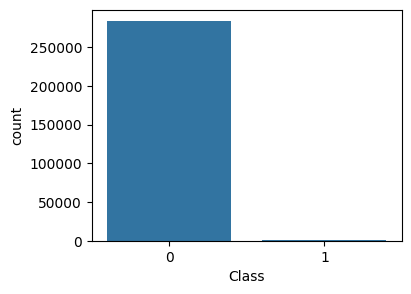

In [74]:
plt.figure(figsize=(4,3))
sns.countplot(x='Class',data=df)

# 0: No Fraud
# 1: Fraud
plt.show()

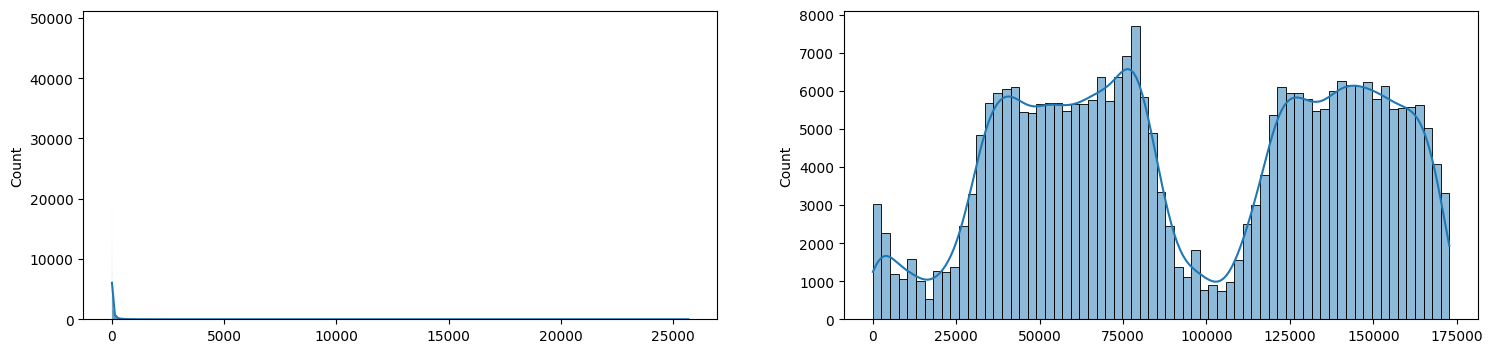

In [28]:
fig, axes = plt.subplots(1,2, figsize=(18,4))

amount_values = df["Amount"].values
time_values = df["Time"].values

sns.histplot(amount_values, ax=axes[0], kde=True)
sns.histplot(time_values, ax=axes[1], kde=True)

plt.show()

In [29]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Scaling Amount and Time columns as well

In [30]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df["scaled_amount"] = rob_scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df["scaled_time"] = rob_scaler.fit_transform(df["Time"].values.reshape(-1,1))

df.drop(["Time", "Amount"], axis=1, inplace=True)

In [31]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


Random Undersampling of data

In [77]:
#Randomizing the dataset
df = df.sample(frac=1)

# Undersampling the dataset
fraud_df = df.loc[df["Class"]==1]
non_fraud_df = df.loc[df["Class"]==0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
274590,1.632956,-0.369886,-1.422054,0.830300,-0.489263,-1.692769,0.386929,-0.390656,0.871447,-0.993716,...,-0.325313,0.150651,0.764544,-0.241901,-0.159225,-0.028485,0.019837,0,2.115000,0.956414
88258,-1.644403,3.129852,-2.576977,3.415573,-0.448525,-1.241893,-1.991652,1.002665,-2.809071,-4.153692,...,-0.648576,-0.318617,-0.680413,0.389869,0.055750,0.394682,0.298821,1,-0.214910,-0.265898
193122,2.066011,-0.061412,-1.639682,0.022389,0.555588,-0.272966,0.087345,-0.120091,0.322244,0.162973,...,0.888366,-0.028527,0.262425,0.310318,-0.129471,-0.024326,-0.066614,0,-0.293440,0.532290
156988,0.745153,2.809299,-5.825406,5.835566,0.512320,-0.615622,-2.916576,0.776710,-1.878832,-4.546936,...,-0.874383,-0.083995,-0.651442,0.454594,0.050376,0.756953,0.383869,1,-0.307413,0.289066
120837,-5.140723,3.568751,-5.896245,4.164720,-4.091193,-1.989960,-5.472436,2.422821,-2.909735,-6.287803,...,0.118022,-0.332704,0.139941,0.324758,-0.180769,0.177810,0.661555,1,1.088521,-0.102374


In [78]:
new_df.shape

(984, 31)

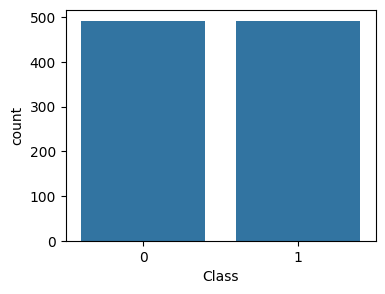

In [79]:
plt.figure(figsize=(4,3))
sns.countplot(x="Class", data = new_df)

plt.show()

Removing Outliers

<Axes: >

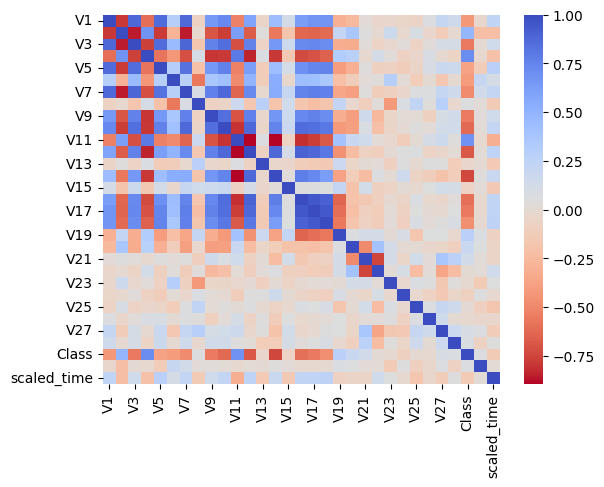

In [36]:
sns.heatmap(new_df.corr(),cmap='coolwarm_r')

In [37]:
corr = new_df.corr()

# corr_with_class = corr["Class"].abs().sort_values(ascending=False)
corr_with_class = corr["Class"].sort_values(ascending=False)
print(corr_with_class)

Class            1.000000
V4               0.707415
V11              0.686289
V2               0.487038
V19              0.278881
V20              0.186985
V21              0.135238
V27              0.093048
V28              0.080295
scaled_amount    0.072895
V8               0.063214
V22              0.004923
V25             -0.004203
V23             -0.008345
V26             -0.016110
V13             -0.044520
V15             -0.072605
V24             -0.095967
scaled_time     -0.140396
V5              -0.376005
V6              -0.408024
V1              -0.427089
V18             -0.473275
V7              -0.482322
V9              -0.554221
V17             -0.558794
V3              -0.559513
V16             -0.596641
V10             -0.626659
V12             -0.685447
V14             -0.746890
Name: Class, dtype: float64


Text(0.5, 1.0, 'V14')

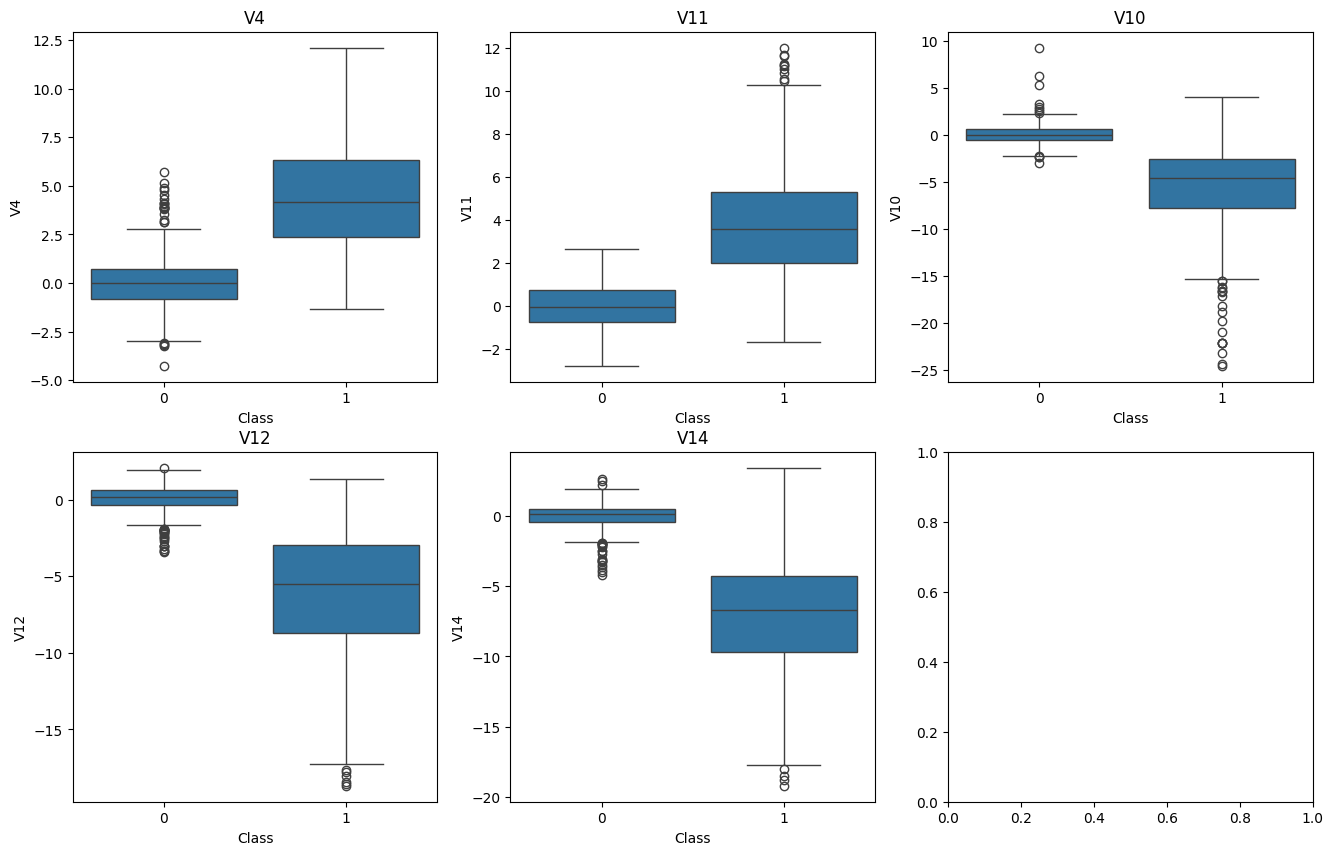

In [38]:
#Making boxplots to find outliers for v4 v11 v10 v12 v14

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[0,0])
axes[0,0].set_title("V4")
sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[0,1])
axes[0,1].set_title("V11")
sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[0,2])
axes[0,2].set_title("V10")
sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[1,0])
axes[1,0].set_title("V12")
sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1,1])
axes[1,1].set_title("V14")

From the above data we found that maximum outliers can be seen in v10, v12, v14. So we remove outliers from these columns only and not from all the columns to maintain a trade off between data values and outliers

In [39]:
#using Interquartile Method

# V14
v14_fraud = new_df["V14"].loc[new_df["Class"]==1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
v14_cut_off = v14_iqr*1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)

#V12
v12_fraud = new_df["V12"].loc[new_df["Class"]==1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr*1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)

#V10
v10_fraud = new_df["V10"].loc[new_df["Class"]==1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr*1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)

Text(0.5, 1.0, 'V14')

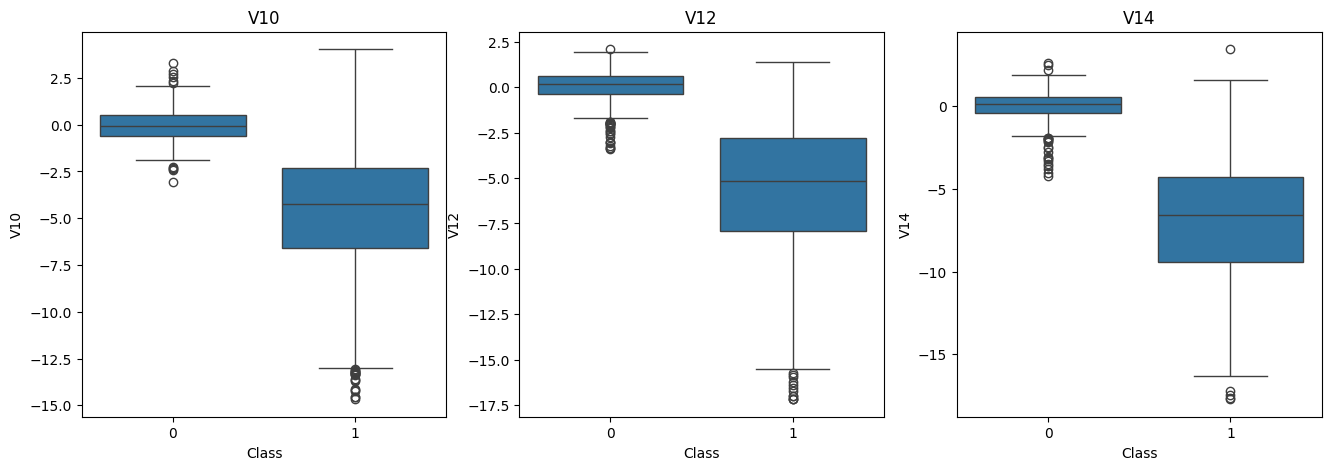

In [40]:
#Making boxplots to compare outliers for v10 v12 v14

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[0])
axes[0].set_title("V10")
sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[1])
axes[1].set_title("V12")
sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[2])
axes[2].set_title("V14")

Using Machine Learning Models

In [41]:
new_df.shape

(946, 31)

In [42]:
new_df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
24340,-1.253470,0.370166,2.761715,0.470916,-1.006174,0.995850,-0.794113,1.077604,0.556766,-1.129655,...,0.156477,-0.196743,0.272298,0.170580,0.423495,-0.031571,-0.022256,0,-0.151051,-0.605118
82484,-0.927443,-0.160751,2.334777,-0.021353,0.328066,-0.028156,-0.002089,0.072573,-0.528126,-0.094989,...,0.648225,-0.102308,0.116738,-0.058283,1.233032,-0.179324,-0.153373,0,0.361210,-0.296902
253978,-2.898371,2.611360,-1.106051,-1.094396,-0.824703,-0.446289,-0.906256,1.646913,0.553131,-1.128617,...,-0.834475,0.036835,-1.151394,0.012294,-0.241896,-0.605628,0.107931,0,-0.138336,0.843877
106998,0.315642,1.636778,-1.519650,4.028571,-1.186794,-0.789813,-2.279807,0.472988,-1.657635,-2.894990,...,-0.108002,-0.165442,0.279895,0.808783,0.117363,0.589595,0.309064,1,-0.254454,-0.169915
119348,1.149378,-0.161502,-0.127520,-0.050147,-0.294413,-0.807556,0.212668,-0.094413,-0.122262,0.038962,...,-1.420049,0.110906,-0.012753,0.047457,0.622256,-0.126317,-0.000683,0,0.740446,-0.108953


In [43]:
X = new_df.drop("Class",axis=1)
y = new_df["Class"]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [46]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [80]:
from sklearn.model_selection import cross_val_score

# (key,classifier) here is a dictionary
for key, classifier in classifiers.items():
  classifier.fit(X_train, y_train)
  training_score = cross_val_score(classifier, X_train, y_train, cv=5)
  print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "%")

Classifiers:  LogisticRegression Has a training score of 94.0 %
Classifiers:  KNeighborsClassifier Has a training score of 92.0 %
Classifiers:  SVC Has a training score of 93.0 %
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 %


Using GridSearchCV

In [48]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [49]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross Validation Score:  93.78%
Knears Neighbors Cross Validation Score 92.99%
Support Vector Classifier Cross Validation Score 93.65%
DecisionTree Classifier Cross Validation Score 90.48%


In [50]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [51]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9760547400268936
KNears Neighbors:  0.9284093455849396
Support Vector Classifier:  0.9755154639175259
Decision Tree Classifier:  0.9036446660690273


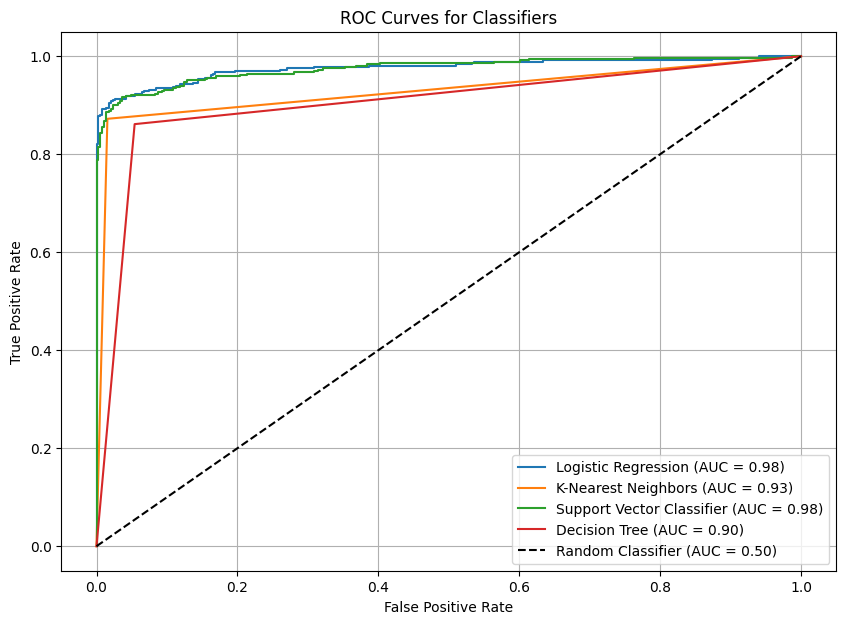

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curves and AUC for each model
fpr_log, tpr_log, _ = roc_curve(y_train, log_reg_pred)
fpr_knn, tpr_knn, _ = roc_curve(y_train, knears_pred)
fpr_svc, tpr_svc, _ = roc_curve(y_train, svc_pred)
fpr_tree, tpr_tree, _ = roc_curve(y_train, tree_pred)

# AUC scores
auc_log = roc_auc_score(y_train, log_reg_pred)
auc_knn = roc_auc_score(y_train, knears_pred)
auc_svc = roc_auc_score(y_train, svc_pred)
auc_tree = roc_auc_score(y_train, tree_pred)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})')
plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Classifier (AUC = {auc_svc:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')

# Reference line (random guess)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
# k-- : black dashed line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [53]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Rename feature and label variables
original_X = df.drop(columns='Class', axis=1)
original_y = df['Class']

# Train-test split
original_X_train, original_X_test, original_y_train, original_y_test = train_test_split(
    original_X, original_y, test_size=0.2, stratify=original_y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
original_X_train_sm, original_y_train_sm = smote.fit_resample(original_X_train, original_y_train)

# Logistic Regression setup with hyperparameter search
log_reg_sm = LogisticRegression()
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Train the model on SMOTE-balanced data
rand_log_reg.fit(original_X_train_sm, original_y_train_sm)

# Best logistic regression model
best_model = rand_log_reg.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(original_X_test)
y_proba = best_model.predict_proba(original_X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(original_y_test, y_pred))
print("\nClassification Report:\n", classification_report(original_y_test, y_pred, digits=4))
print("ROC AUC Score:", roc_auc_score(original_y_test, y_proba))


Confusion Matrix:
 [[55440  1424]
 [   11    87]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9750    0.9872     56864
           1     0.0576    0.8878    0.1081        98

    accuracy                         0.9748     56962
   macro avg     0.5287    0.9314    0.5477     56962
weighted avg     0.9982    0.9748    0.9857     56962

ROC AUC Score: 0.9633314144453504


In [54]:
from sklearn.metrics import average_precision_score


avg_precision = average_precision_score(original_y_test, y_proba)
print("Average Precision-recall Score:", round(avg_precision, 4))

Average Precision-recall Score: 0.662


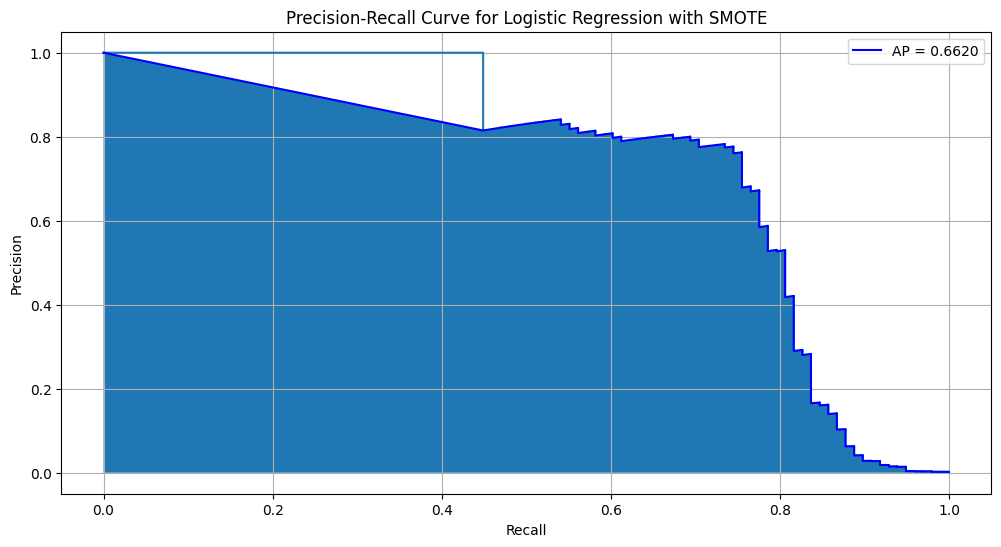

In [55]:
from sklearn.metrics import precision_recall_curve

# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(original_y_test, y_proba)

# Average precision score (for area under the curve)
avg_precision = average_precision_score(original_y_test, y_proba)

# Plot the precision-recall curve
plt.figure(figsize=(12, 6))
plt.step(recall, precision)
plt.fill_between(recall, precision)
plt.plot(recall, precision, label=f'AP = {avg_precision:.4f}', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression with SMOTE')
plt.legend()
plt.grid(True)
plt.show()


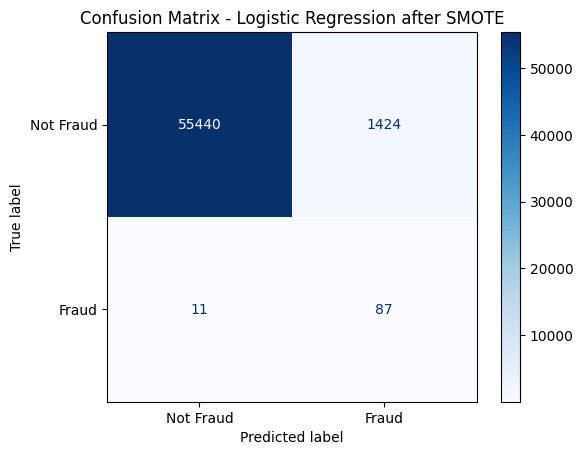

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(original_y_test, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression after SMOTE")
plt.grid(False)
plt.show()


Using Deep Learning

In [57]:
# X = new_df.drop('Class', axis=1)
# y = new_df['Class']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
# y_test = y_test.values

In [89]:
X_train.shape

(756, 30)

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])


In [59]:
undersample_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988 (7.77 KB)

 Trainable params: 1,988 (7.77 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
undersample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
25/25 - 4s - 149ms/step - accuracy: 0.7864 - loss: 0.4327 - val_accuracy: 0.8289 - val_loss: 0.3691
Epoch 2/20
25/25 - 0s - 5ms/step - accuracy: 0.8907 - loss: 0.3112 - val_accuracy: 0.9145 - val_loss: 0.2841
Epoch 3/20
25/25 - 0s - 6ms/step - accuracy: 0.9156 - loss: 0.2451 - val_accuracy: 0.9276 - val_loss: 0.2330
Epoch 4/20
25/25 - 0s - 7ms/step - accuracy: 0.9321 - loss: 0.2034 - val_accuracy: 0.9539 - val_loss: 0.2050
Epoch 5/20
25/25 - 0s - 8ms/step - accuracy: 0.9387 - loss: 0.1755 - val_accuracy: 0.9474 - val_loss: 0.1837
Epoch 6/20
25/25 - 0s - 8ms/step - accuracy: 0.9421 - loss: 0.1544 - val_accuracy: 0.9408 - val_loss: 0.1741
Epoch 7/20
25/25 - 0s - 13ms/step - accuracy: 0.9437 - loss: 0.1388 - val_accuracy: 0.9474 - val_loss: 0.1643
Epoch 8/20
25/25 - 0s - 17ms/step - accuracy: 0.9470 - loss: 0.1282 - val_accuracy: 0.9474 - val_loss: 0.1634
Epoch 9/20
25/25 - 0s - 16ms/step - accuracy: 0.9520 - loss: 0.1205 - val_accuracy: 0.9474 - val_loss: 0.1595
Epoch 10/20
25

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


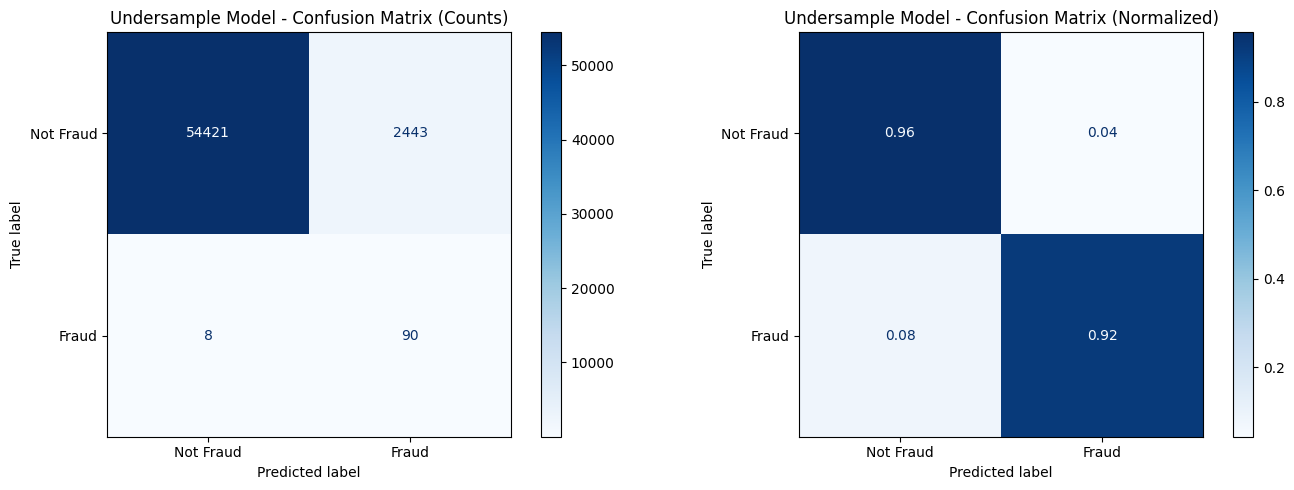

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities on the original test set
y_proba_us = undersample_model.predict(original_X_test)

# Get predicted classes
y_pred_us = np.argmax(y_proba_us, axis=1)

# Confusion matrices
cm_raw_us = confusion_matrix(original_y_test, y_pred_us)
cm_norm_us = confusion_matrix(original_y_test, y_pred_us, normalize='true')

# Plot both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw counts
disp_raw_us = ConfusionMatrixDisplay(confusion_matrix=cm_raw_us, display_labels=["Not Fraud", "Fraud"])
disp_raw_us.plot(ax=axes[0], cmap=plt.cm.Blues, values_format='d')
axes[0].set_title("Undersample Model - Confusion Matrix (Counts)")
axes[0].grid(False)

# Normalized
disp_norm_us = ConfusionMatrixDisplay(confusion_matrix=cm_norm_us, display_labels=["Not Fraud", "Fraud"])
disp_norm_us.plot(ax=axes[1], cmap=plt.cm.Blues, values_format='.2f')
axes[1].set_title("Undersample Model - Confusion Matrix (Normalized)")
axes[1].grid(False)

plt.tight_layout()
plt.show()


Keras for Oversampling SMOTE

In [66]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(original_X_train, original_y_train)

n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [83]:
print(Xsm_train.shape)
print(original_y_train.shape)

(454902, 30)
(227845,)


In [88]:
ysm_train.value_counts()


,count
Class,
0,227451
1,227451


In [67]:
oversample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 11s - 9ms/step - accuracy: 0.9757 - loss: 0.0695 - val_accuracy: 0.9979 - val_loss: 0.0186
Epoch 2/20
1214/1214 - 4s - 3ms/step - accuracy: 0.9971 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 3/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9985 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 4/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9989 - loss: 0.0052 - val_accuracy: 0.9997 - val_loss: 0.0039
Epoch 5/20
1214/1214 - 4s - 3ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 6/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/20
1214/1214 - 4s - 3ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9899 - val_loss: 0.0334
Epoch 8/20
1214/1214 - 6s - 5ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 9/20
1214/1214 - 5s - 4ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9995 -

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


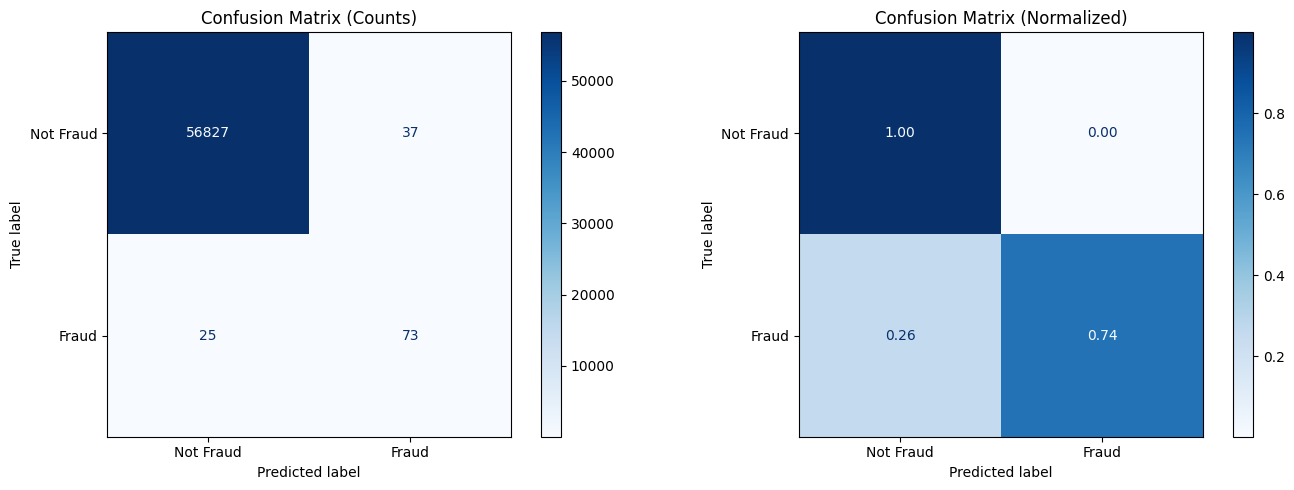

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities on test data
y_proba_nn = oversample_model.predict(original_X_test)

# Get predicted class labels
y_pred_nn = np.argmax(y_proba_nn, axis=1)

# Raw confusion matrix (no normalization)
cm_raw = confusion_matrix(original_y_test, y_pred_nn)

# Normalized confusion matrix
cm_normalized = confusion_matrix(original_y_test, y_pred_nn, normalize='true')

# Plot both
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot raw confusion matrix
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm_raw, display_labels=["Not Fraud", "Fraud"])
disp_raw.plot(ax=axes[0], cmap=plt.cm.Blues, values_format='d')
axes[0].set_title("Confusion Matrix (Counts)")
axes[0].grid(False)

# Plot normalized confusion matrix
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=["Not Fraud", "Fraud"])
disp_norm.plot(ax=axes[1], cmap=plt.cm.Blues, values_format='.2f')
axes[1].set_title("Confusion Matrix (Normalized)")
axes[1].grid(False)

plt.tight_layout()
plt.show()
